https://www.bilibili.com/video/BV1f54ZzGEMC

6.1 数据操作

In [4]:
import torch

In [5]:
x = torch.arange(12)
print(x)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


In [6]:
x.shape

torch.Size([12])

In [7]:
xx =x.reshape(12,1)
xx

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11]])

In [8]:
y = torch.ones_like(xx)
y

tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]])

In [9]:
xx == y

tensor([[False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [10]:
torch.cat([xx, y], dim=0)  # concatenate along rows

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1]])

In [11]:
xx + x # element-wise addition广播机制只有在行或者列数相同的情况下才能进行

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
        [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
        [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
        [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
        [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
        [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
        [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
        [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
        [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]])

In [12]:
z = torch.zeros(7,7)
z
zz =torch.ones(7,1)
zz

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [13]:
z + zz

tensor([[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]])

8.3 数据预处理

In [14]:
import os

In [15]:
os.makedirs('data', exist_ok=True)
data_file = os.path.join('data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('2,,127500\n')
    f.write('3,Gravel,106000\n')
    f.write('4,Paved,178100\n')
    f.write('4,,140000\n')

In [16]:
import pandas as pd
data = pd.read_csv(data_file)
data

,NumRooms,Alley,Price
0,2,NaN,127500
1,3,Gravel,106000
2,4,Paved,178100
3,4,NaN,140000


In [17]:
inputs = pd.get_dummies(data[['NumRooms', 'Alley']])
inputs

,NumRooms,Alley_Gravel,Alley_Paved
0,2,False,False
1,3,True,False
2,4,False,True
3,4,False,False


In [18]:
inputs = pd.get_dummies(data[['NumRooms', 'Alley']],drop_first=True)
inputs

,NumRooms,Alley_Paved
0,2,False
1,3,False
2,4,True
3,4,False


In [19]:
inputs = pd.get_dummies(data[['NumRooms', 'Alley']],dummy_na=True)
inputs

,NumRooms,Alley_Gravel,Alley_Paved,Alley_nan
0,2,False,False,True
1,3,True,False,False
2,4,False,True,False
3,4,False,False,True


In [20]:
data_01 = pd.get_dummies(data)
data_01

,NumRooms,Price,Alley_Gravel,Alley_Paved
0,2,127500,False,False
1,3,106000,True,False
2,4,178100,False,True
3,4,140000,False,False


21.3 线性回归的从零开始实现

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import torch
#from d2l import torch as d2l

In [22]:
#构造人造数据集
def synthetic_data(w, b, num_examples):  #@save
    """生成y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

#x, y = synthetic_data(true_w, true_b, 10)
#x, y


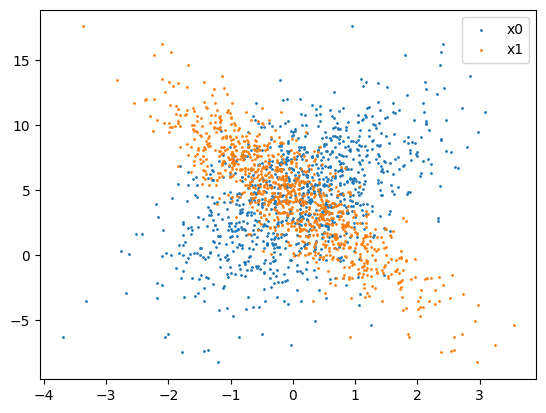

In [23]:
plt.scatter(features[:, (0)].detach().numpy(), labels.detach().numpy(), 1, label = 'x0'); #绘制第一个特征与标签的散点图
plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1, label = 'x1'); #绘制第二个特征与标签的散点图
plt.legend();   

In [24]:
#读取数据集
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        
        yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break




tensor([[-0.4411,  1.0927],
        [ 0.1344,  1.1574],
        [-0.5637, -0.5413],
        [-0.3745, -0.5599],
        [ 1.8288, -1.3003],
        [-0.7284,  0.0710],
        [ 0.3952, -0.7885],
        [-0.9604,  0.5801],
        [ 0.1952,  1.0903],
        [ 0.2849,  0.1221]]) 
 tensor([[-0.3826],
        [ 0.5286],
        [ 4.9069],
        [ 5.3571],
        [12.2742],
        [ 2.5104],
        [ 7.6805],
        [ 0.3268],
        [ 0.8936],
        [ 4.3451]])


In [25]:
#初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [26]:
def linreg(X, w, b):  #@save
    """线性回归模型。"""
    return torch.matmul(X, w) + b

In [27]:
def squared_loss(y_hat, y):  #@save
    """均方损失。"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [28]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降。"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [29]:
ir = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # 计算损失值
        l.sum().backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], ir, batch_size)  # 使用小批量随机梯度下降迭代模型参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.028945
epoch 2, loss 0.000104
epoch 3, loss 0.000053


22.4 线性回归的简洁实现

In [30]:
def load_array(data_arrays, batch_size, is_train=True):
    """构造一个PyTorch数据迭代器。"""
    dataset = torch.utils.data.TensorDataset(*data_arrays)
    return torch.utils.data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[-1.3006, -1.4446],
         [-0.0891,  1.7465],
         [ 2.3795,  0.0425],
         [-0.2383,  1.7084],
         [-2.0815, -0.5527],
         [ 0.1572, -0.0837],
         [ 0.3783, -1.8456],
         [ 1.5485, -0.3799],
         [ 1.4635, -0.0373],
         [ 3.0912, -0.1885]]),
 tensor([[ 6.5173],
         [-1.9062],
         [ 8.8161],
         [-2.0854],
         [ 1.9135],
         [ 4.7932],
         [11.2327],
         [ 8.5872],
         [ 7.2398],
         [11.0234]])]

In [33]:
from torch import nn
net = nn.Sequential(nn.Linear(2,1))

In [ ]:
net[0].weight.data.normal_(0, 0.01)#权重值服从正态分布
net[0].bias.data.fill_(0)#偏置值都设置为零

tensor([0.])

In [36]:
loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [40]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)  # 计算损失值
        trainer.zero_grad()
        l.backward()  # 小批量的损失对模型参数求梯度
        trainer.step()  # 使用小批量随机梯度下降迭代模型参数
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {float(l.mean()):f}')

epoch 1, loss 0.000105
epoch 2, loss 0.000106
epoch 3, loss 0.000106
